In [1]:
using DataFrames, Gadfly, LowRankModels

In [2]:
using PyPlot

In [3]:
using StatsBase

In [4]:
include("proxgrad.jl")

proxgrad_const (generic function with 1 method)

In [5]:
training = readtable("trainv1.csv")
training[:Month] = DateTime(training[:Month],"yyyy-mm-ddTHH:MM:SS");

In [6]:
training[:MonthNumber]=Dates.month(training[:Month]);

In [7]:
training

,Month,Text_General_Code,CrimeNumber,x1,Year,Unemployment,Child_mortality,hospital_ambulization_rate,Cancer_mortality,Days_good_air_quality,Homicide_mortality_rate,Suicide_mortality_rate,Theft,All_Other_Offenses,Other_Assaults,Vandalism,Narcotic,Burglary,Fraud,Retrieving,Robbery,Aggravated_Assault,Driving_Under_The_Influcence,Disorderly_Conduct,Weapon_Violations,Other_Sex_Offenses,Prostitution,Rape,Drinking_Violation,Vagrancy_Loitering,Arson,Forgery_Counterfeiting,Embezzlement,Homicide,Offenses_Against_Family_Children,Gambling_Violations,Receiving_Stolen_Property,Temperature_Max,Temperature_Min,Temperature_Avg,Temperature_Departure,HDD,CDD,Precipitation,New_Snow,Snow_Depth,MonthNumber
1,2006-01-01T00:00:00,All_Other_Offenses,2,4252,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1
2,2006-01-01T00:00:00,Arson,3,44,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1
3,2006-01-01T00:00:00,Drinking_Violation,7,425,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1
4,2006-01-01T00:00:00,Disorderly_Conduct,6,381,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1
5,2006-01-01T00:00:00,Embezzlement,8,40,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1
6,2006-01-01T00:00:00,Forgery_Counterfeiting,9,68,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1
7,2006-01-01T00:00:00,Fraud,10,777,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1
8,2006-01-01T00:00:00,Gambling_Violations,11,9,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1
9,2006-01-01T00:00:00,Narcotic,13,1195,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1
10,2006-01-01T00:00:00,Offenses_Against_Family_Children,14,20,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1


In [163]:
by(training,[:Text_General_Code],df -> sum(df[:x1]))

,Text_General_Code,x1
1,Aggravated_Assault,55506
2,All_Other_Offenses,239079
3,Arson,3366
4,Burglary,68948
5,Disorderly_Conduct,24873
6,Drinking_Violation,37668
7,Embezzlement,2661
8,Forgery_Counterfeiting,3577
9,Fraud,57755
10,Gambling_Violations,657


In [8]:
data  = training[:,[:CrimeNumber,:x1,:MonthNumber,:Unemployment
        ,:Child_mortality,:hospital_ambulization_rate,:Cancer_mortality,:Days_good_air_quality,
        :Homicide_mortality_rate,:Suicide_mortality_rate,:Temperature_Max,:Temperature_Min,
        :Temperature_Avg,:Temperature_Departure,:HDD,:CDD,:Precipitation,:New_Snow,:Snow_Depth]]

,CrimeNumber,x1,MonthNumber,Unemployment,Child_mortality,hospital_ambulization_rate,Cancer_mortality,Days_good_air_quality,Homicide_mortality_rate,Suicide_mortality_rate,Temperature_Max,Temperature_Min,Temperature_Avg,Temperature_Departure,HDD,CDD,Precipitation,New_Snow,Snow_Depth
1,2,4252,1,0.062,87.5,1608.9,228.1,154,24.4,9.0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0
2,3,44,1,0.062,87.5,1608.9,228.1,154,24.4,9.0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0
3,7,425,1,0.062,87.5,1608.9,228.1,154,24.4,9.0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0
4,6,381,1,0.062,87.5,1608.9,228.1,154,24.4,9.0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0
5,8,40,1,0.062,87.5,1608.9,228.1,154,24.4,9.0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0
6,9,68,1,0.062,87.5,1608.9,228.1,154,24.4,9.0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0
7,10,777,1,0.062,87.5,1608.9,228.1,154,24.4,9.0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0
8,11,9,1,0.062,87.5,1608.9,228.1,154,24.4,9.0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0
9,13,1195,1,0.062,87.5,1608.9,228.1,154,24.4,9.0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0
10,14,20,1,0.062,87.5,1608.9,228.1,154,24.4,9.0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0


In [74]:
aaa = training[:,[:MonthNumber,:Unemployment
        ,:Child_mortality,:hospital_ambulization_rate,:Cancer_mortality,:Days_good_air_quality,
        :Homicide_mortality_rate,:Suicide_mortality_rate,:Temperature_Max,:Temperature_Min,
        :Temperature_Avg,:Temperature_Departure,:HDD,:CDD,:Precipitation,:New_Snow,:Snow_Depth]]
convert(Array{Float64,2},aaa)

1799×17 Array{Float64,2}:
  1.0  0.062  87.5  1608.9  228.1  154.0  …  0.0  0.14      0.0129032  0.0
  1.0  0.062  87.5  1608.9  228.1  154.0     0.0  0.14      0.0129032  0.0
  1.0  0.062  87.5  1608.9  228.1  154.0     0.0  0.14      0.0129032  0.0
  1.0  0.062  87.5  1608.9  228.1  154.0     0.0  0.14      0.0129032  0.0
  1.0  0.062  87.5  1608.9  228.1  154.0     0.0  0.14      0.0129032  0.0
  1.0  0.062  87.5  1608.9  228.1  154.0  …  0.0  0.14      0.0129032  0.0
  1.0  0.062  87.5  1608.9  228.1  154.0     0.0  0.14      0.0129032  0.0
  1.0  0.062  87.5  1608.9  228.1  154.0     0.0  0.14      0.0129032  0.0
  1.0  0.062  87.5  1608.9  228.1  154.0     0.0  0.14      0.0129032  0.0
  1.0  0.062  87.5  1608.9  228.1  154.0     0.0  0.14      0.0129032  0.0
  1.0  0.062  87.5  1608.9  228.1  154.0  …  0.0  0.14      0.0129032  0.0
  1.0  0.062  87.5  1608.9  228.1  154.0     0.0  0.14      0.0129032  0.0
  1.0  0.062  87.5  1608.9  228.1  154.0     0.0  0.14      0.0129032  0.0

In [41]:
glrm = GLRM(data, Loss[OvALoss(25),QuadLoss(),OvALoss(12),
    QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),
    QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),
    QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),
    QuadLoss()], QuadReg(0.1),QuadReg(0.1) , 2);

In [47]:
X,W,ch = fit!(glrm)

Fitting GLRM
Iteration 10: objective value = 6.315356897067908e9


(
[191.967 -0.657564 … -6.00783 22.8445; -236.437 -73.2405 … -61.7796 -86.2104],

[-0.62099 1.55543 … 0.575831 -0.462428; 0.130339 1.29451 … 0.965996 -0.862545],

LowRankModels.ConvergenceHistory("ProxGradGLRM",[6.31779e9,6.31544e9,6.3154e9,6.3154e9,6.31538e9,6.31538e9,6.31537e9,6.31537e9,6.31536e9,6.31536e9,6.31536e9,6.31535e9],Float64[],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.497075,0.717981,0.985822,1.19494,1.39684,1.60467,1.83453,2.04255,2.25014,2.59186,2.85046],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],0))

In [43]:
X

2×1799 Array{Float64,2}:
  191.205   -0.818582   16.6315   14.6114  …   -5.7074   -6.14972   22.6644
 -238.538  -73.6384    -88.4601  -86.7611     -62.4797  -62.1409   -86.6413

In [44]:
W

2×54 Array{Float64,2}:
 -1.05637   1.70811  -1.09587  0.54526  …  -2.25057  0.575831  -0.462428
  0.209417  1.1693    1.16187  1.24357     -1.11944  0.965996  -0.862545

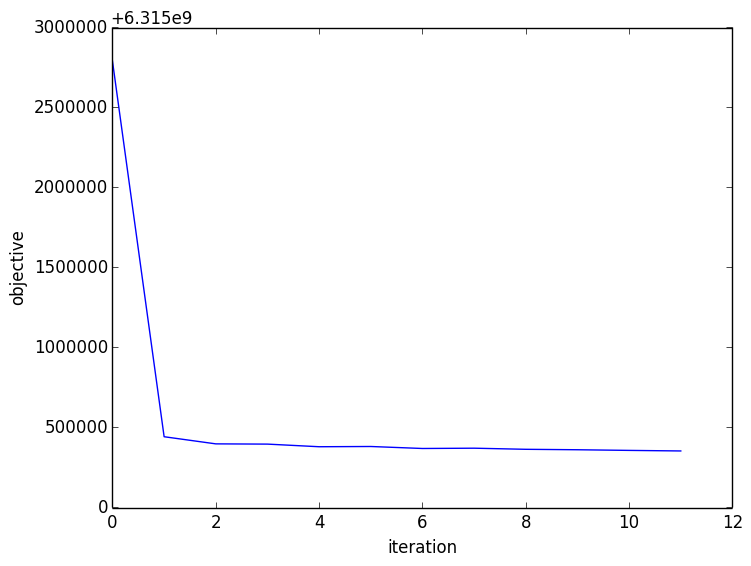

PyObject <matplotlib.text.Text object at 0x322e289d0>

  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/rainyniu/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /User

In [48]:
PyPlot.plot(ch.objective)
xlabel("iteration")
ylabel("objective")

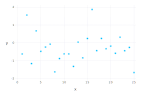

In [58]:
Gadfly.plot(W, x = 1:25,y=W[1,:][1:25] , Geom.point)

In [73]:
@show size(W[:,1:25]')
@show size(1:25)
hcat(1:25,W[:,1:25]')

size((W[:,1:25])') = (25,2)
size(1:25) = (25,)


25×3 Array{Float64,2}:
  1.0  -0.62099     0.130339 
  2.0   1.55543     1.29451  
  3.0  -1.15894     0.516566 
  4.0   0.672231    0.526829 
  5.0  -0.474416    1.52477  
  6.0  -0.234382    0.0526701
  7.0  -0.0725074  -0.0510428
  8.0  -1.62289     0.347465 
  9.0  -0.878072    0.192102 
 10.0  -0.615465    0.145324 
 11.0  -0.618332    0.200828 
 12.0  -1.31639     0.283341 
 13.0   0.0403303   0.330149 
 14.0  -0.83851     0.184453 
 15.0   0.245138    0.0825173
 16.0   1.8684      1.92125  
 17.0  -0.435672    0.536425 
 18.0   0.248505    0.188458 
 19.0  -0.328482    0.874002 
 20.0  -0.181277    0.302534 
 21.0  -0.581813    0.126454 
 22.0   0.316624    0.512993 
 23.0  -0.440551    0.53542  
 24.0  -0.254219    0.0486105
 25.0  -1.6601      0.35194  

In [65]:
glrm1 = GLRM(data, QuadLoss(), ZeroReg(), ZeroReg(), 1);

In [66]:
X1,W1,ch1 = fit!(glrm1)

Fitting GLRM
Iteration 10: objective value = 1.560476709985871e8


(
[5.38115 31.2968 … 9.4435 1.09684],

[0.0585832 0.121076 … -0.00841206 163.868],

LowRankModels.ConvergenceHistory("ProxGradGLRM",[2.76204e9,2.7606e9,1.51138e9,1.03599e9,8.75078e8,8.75078e8,4.81872e8,3.3142e8,2.80492e8,2.80492e8,1.56048e8,1.08432e8,9.23136e7,9.23136e7],Float64[],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.242682,0.35333,0.683399,0.796864,0.905977,1.01774,1.22943,1.4409,1.6791,1.8071,1.91736,2.01591,2.16288],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],0))

In [57]:
Gadfly.plot(X1, x = 1:25, y=W1[1,:], Geom.point)

LoadError: LoadError: UndefVarError: W1 not defined
while loading In[57], in expression starting on line 1

In [50]:
rank(convert(Array, data))

26

In [9]:
n,d = size(data)

(1799,19)

In [10]:
sample = StatsBase.sample(1:n, 1440,replace = false);
fitdata = data[sample,:]
testdata = data[setdiff(1:n,sample),:];

In [11]:
fitdata[:Days_good_air_quality] = 1.0 * fitdata[:Days_good_air_quality].data;
testdata[:Days_good_air_quality] = 1.0 * testdata[:Days_good_air_quality].data;

In [12]:
for i = 1:16
    x = fitdata[:,(3+i)].data
    means = mean(x)
    sds = std(x)
    fitdata[:,(3+i)].data = (x .- means)/sds
    testdata[:,(3+i)].data = (testdata[:,(3+i)].data .- means)/sds
end

In [13]:
fitdata_other = convert(Array{Float64,2},fitdata)[:,3:end];
testdata_other = convert(Array{Float64,2},testdata)[:,3:end];

In [14]:
columnNames = convert(Array{Symbol},["CrimeNumber","w1","w2","w3","w4","w5",
    "w6","w7","w8","w9","w10","w11","w12","w13","w14","w15"]);

In [38]:
glrm = GLRM(data, Loss[OvALoss(25),QuadLoss(),OvALoss(12),
    QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),
    QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),
    QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),
    QuadLoss()], QuadReg(0.1),QuadReg(0.1) , 14);
    X,W,ch = fit!(glrm);

Fitting GLRM
Iteration 10: objective value = 2.1226026497905092e9
Iteration 20: objective value = 1.7935686973195508e9
Iteration 30: objective value = 1.6184643116868029e9
Iteration 40: objective value = 1.5317676805479221e9
Iteration 50: objective value = 1.4829227573996112e9
Iteration 60: objective value = 1.4570994304553835e9
Iteration 70: objective value = 1.4527815972137878e9


In [33]:
W = W[:,1:25]

3×25 Array{Float64,2}:
 -0.274017   1.36863     1.47573   …   1.03474     0.687899  -1.60462 
 -0.810099  -0.0226334  -0.857788     -0.0886545  -0.806284  -1.03159 
 -0.464998  -0.708916    1.04466      -1.10181     0.191487  -0.725857

In [39]:
writetable("W with k = 14.csv",convert(DataFrame,W))

In [15]:
k = 15
l = 4
m = size(fitdata)[1]
m1 = size(testdata)[1]
errorMat = zeros(k,l)
testsetErr = zeros(k,l)
wMat = zeros(k,k+18)
wMat1 =zeros(k,k+18)
wMat2 =zeros(k,k+18)
wMat3 =zeros(k,k+18)
for i = 1:k
    glrm = GLRM(data, Loss[OvALoss(25),QuadLoss(),OvALoss(12),
    QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),
    QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),
    QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),QuadLoss(),
    QuadLoss()], QuadReg(0.1),QuadReg(0.1) , i);
    X,W,ch = fit!(glrm);
    W = hcat(1:25,W[:,1:25]')
    W = convert(DataFrame,W)
    names!(W,columnNames[1:(i+1)])
    train = join(fitdata, W, on = :CrimeNumber, kind = :left)
    test = join(testdata, W, on = :CrimeNumber, kind = :left)
    x = train[Symbol("w1")].data
    xtest = test[Symbol("w1")].data
    for j = 2:i
        x = [x train[Symbol("w$j")].data]
        xtest = [xtest test[Symbol("w$j")].data]
    end
    X = convert(Array{Float64,2},[ones(m) x])
    X = hcat(X,fitdata_other)
    Xtest = convert(Array{Float64,2},[ones(m1) xtest])
    Xtest = hcat(Xtest,testdata_other)
    y = 1.0*train[:x1].data
    w = proxgrad(QuadLoss(), QuadReg(1) ,X, y; 
             stepsize=.1, maxiters = 500000)
    @show size(w)
    w1 = proxgrad(QuadLoss(), QuadReg(1000) ,X, y; 
             stepsize=.1, maxiters = 500000)
    w2 = proxgrad(HuberLoss(), QuadReg(1) ,X, y; 
             stepsize=.1, maxiters = 500000)
    w3 = proxgrad(HuberLoss(), QuadReg(100) ,X, y; 
             stepsize=.1, maxiters = 500000)
    errorMat[i,1] = mean((y-X*w).^2) 
    errorMat[i,2] = mean((y-X*w1).^2)
    errorMat[i,3] = mean((y-X*w2).^2)
    errorMat[i,4] = mean((y-X*w3).^2)
    y1 = 1.0*test[:x1].data
    writetable("newTrainingWithk=$i.csv",convert(DataFrame,hcat(X,y)))
    writetable("newTestingWithk=$i.csv",convert(DataFrame,hcat(Xtest,y1)))
    testsetErr[i,1] = mean((y1-Xtest*w).^2)
    testsetErr[i,2] = mean((y1-Xtest*w1).^2)
    testsetErr[i,3] = mean((y1-Xtest*w2).^2)
    testsetErr[i,4] = mean((y1-Xtest*w3).^2)
    wMat[i,1:(18+i)] = w
    wMat1[i,1:(18+i)] = w1
    wMat2[i,1:(18+i)] = w2
    wMat3[i,1:(18+i)] = w3
end
#errorMat

Fitting GLRM
Iteration 10: objective value = 6.615824846219513e9
size(w) = (19,)
Fitting GLRM
Iteration 10: objective value = 5.735532453285283e9
size(w) = (20,)
Fitting GLRM
Iteration 10: objective value = 5.992555181806274e9
size(w) = (21,)
Fitting GLRM
Iteration 10: objective value = 5.166812706098679e9
size(w) = (22,)
Fitting GLRM
Iteration 10: objective value = 4.991857468185741e9
Iteration 20: objective value = 4.930076832986198e9
Iteration 30: objective value = 4.894502306367438e9
Iteration 40: objective value = 4.873175306569145e9
Iteration 50: objective value = 4.860490372409802e9
size(w) = (23,)
Fitting GLRM
Iteration 10: objective value = 3.1119736737736363e9
Iteration 20: objective value = 3.0266770531978955e9
Iteration 30: objective value = 3.0125790777104306e9
size(w) = (24,)
Fitting GLRM
Iteration 10: objective value = 3.5813246232724147e9
Iteration 20: objective value = 3.4832916595624824e9
Iteration 30: objective value = 3.451814649640694e9
Iteration 40: objective valu

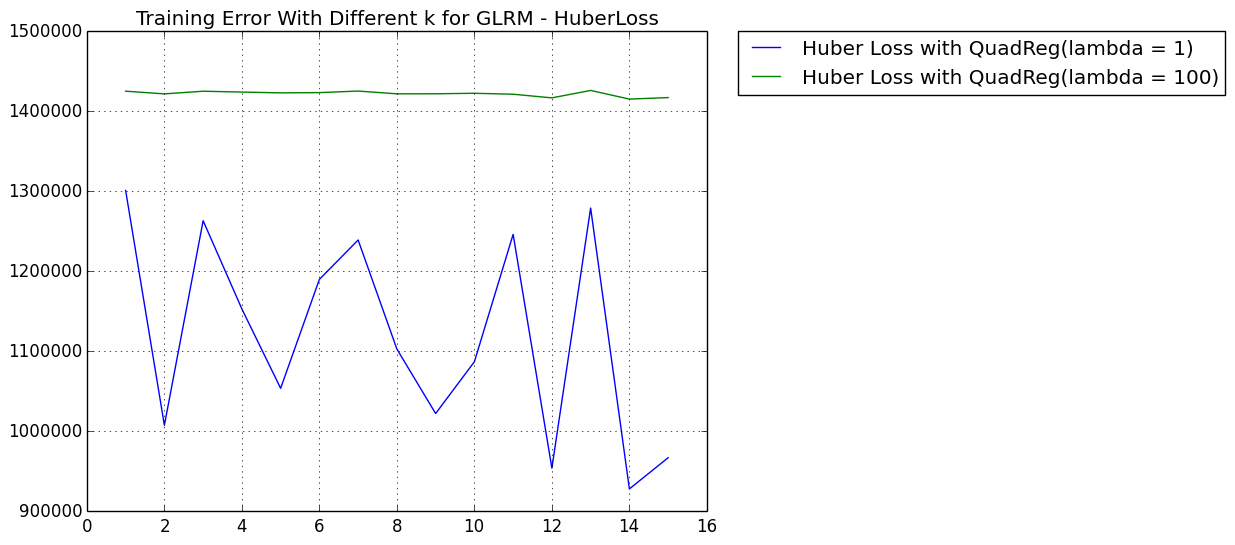

In [16]:
#PyPlot.plot(1:15,errorMat[:,1],label = "Quad Loss with QuadReg(lambda = 1)");
#PyPlot.plot(1:15,errorMat[:,2],label = "Quad Loss with QuadReg(lambda = 1000)");
PyPlot.plot(1:15,errorMat[:,3],label = "Huber Loss with QuadReg(lambda = 1)");
PyPlot.plot(1:15,errorMat[:,4],label = "Huber Loss with QuadReg(lambda = 100)");
PyPlot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
PyPlot.grid("on")
PyPlot.title("Training Error With Different k for GLRM - HuberLoss");

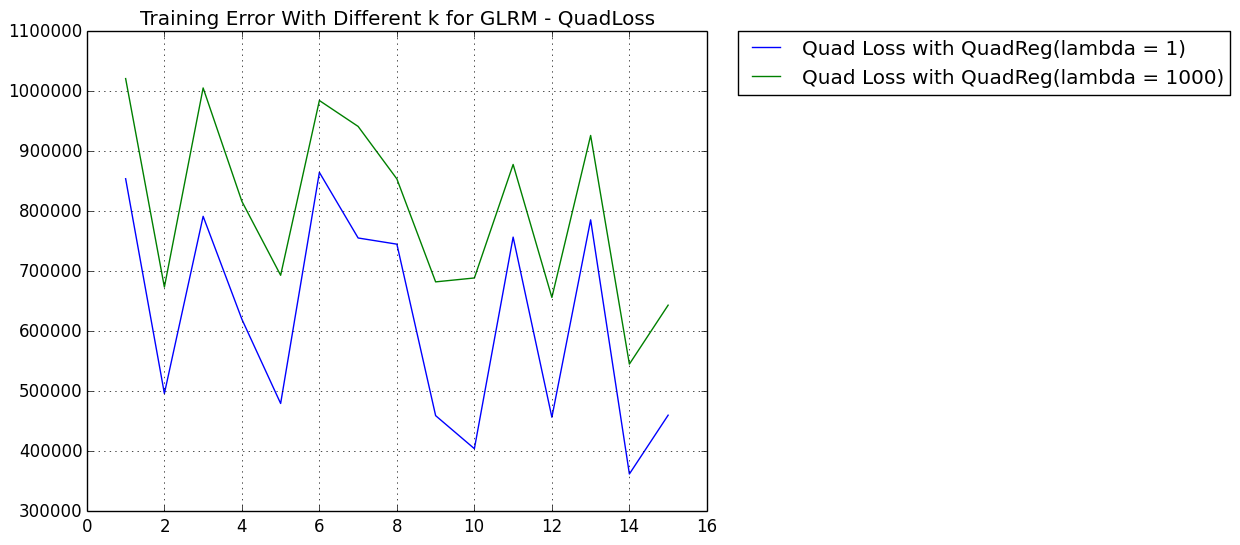

In [17]:
PyPlot.plot(1:15,errorMat[:,1],label = "Quad Loss with QuadReg(lambda = 1)");
PyPlot.plot(1:15,errorMat[:,2],label = "Quad Loss with QuadReg(lambda = 1000)");
#PyPlot.plot(1:15,errorMat[:,3],label = "Huber Loss with QuadReg(lambda = 1)");
#PyPlot.plot(1:15,errorMat[:,4],label = "Huber Loss with QuadReg(lambda = 100)");
PyPlot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
PyPlot.grid("on")
PyPlot.title("Training Error With Different k for GLRM - QuadLoss");

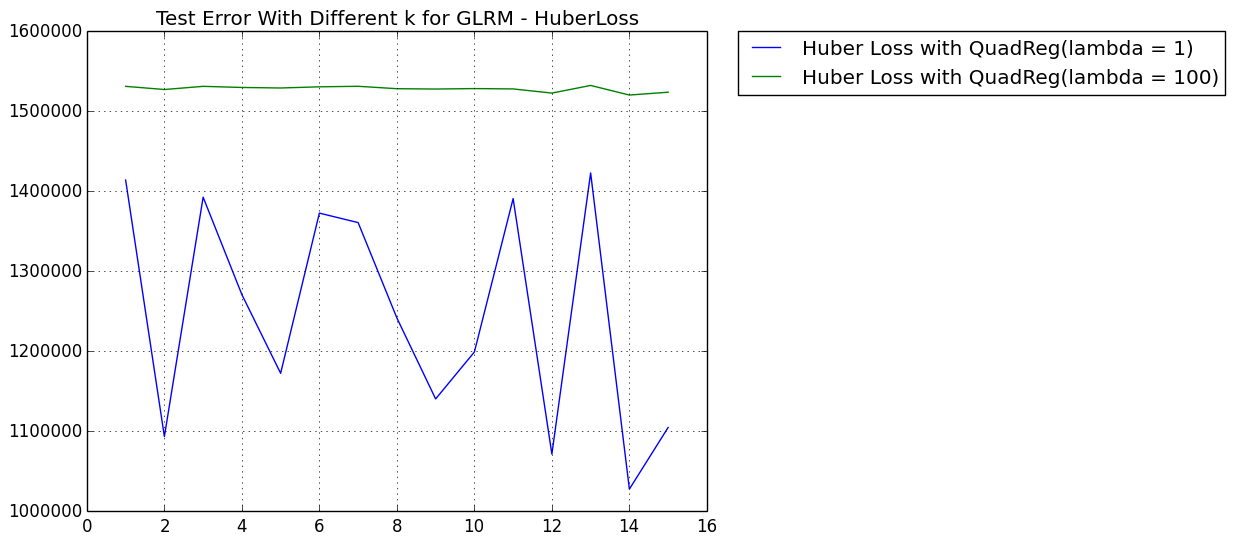

In [18]:
#PyPlot.plot(1:15,testsetErr[:,1],label = "Quad Loss with QuadReg(lambda = 1)");
#PyPlot.plot(1:15,testsetErr[:,2],label = "Quad Loss with QuadReg(lambda = 1000)");
PyPlot.plot(1:15,testsetErr[:,3],label = "Huber Loss with QuadReg(lambda = 1)");
PyPlot.plot(1:15,testsetErr[:,4],label = "Huber Loss with QuadReg(lambda = 100)");
PyPlot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
PyPlot.grid("on")
PyPlot.title("Test Error With Different k for GLRM - HuberLoss");

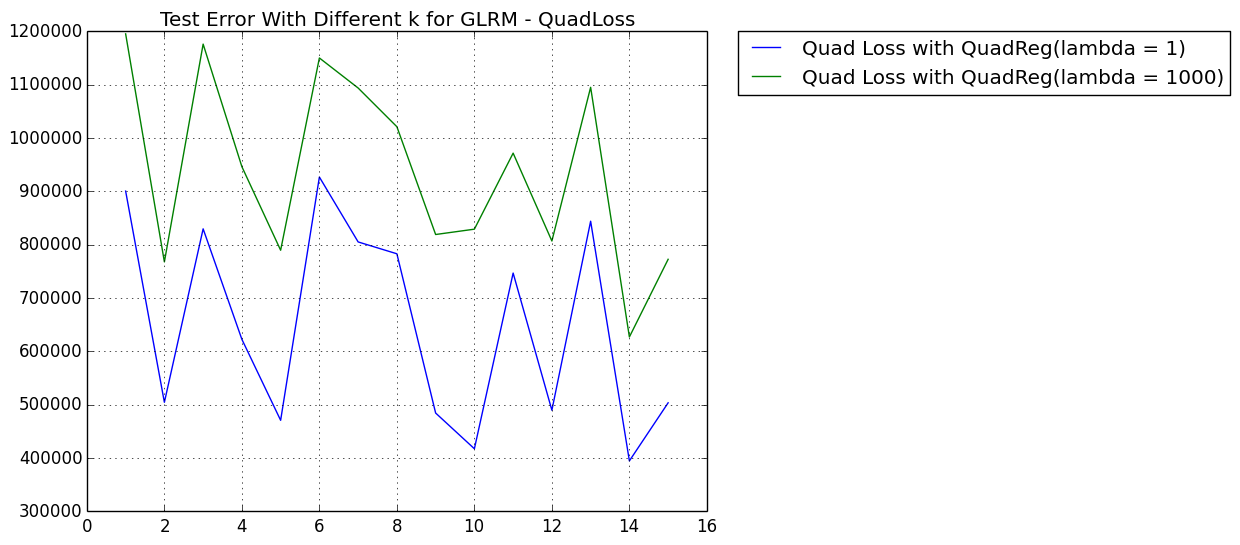

In [19]:
PyPlot.plot(1:15,testsetErr[:,1],label = "Quad Loss with QuadReg(lambda = 1)");
PyPlot.plot(1:15,testsetErr[:,2],label = "Quad Loss with QuadReg(lambda = 1000)");
#PyPlot.plot(1:15,testsetErr[:,3],label = "Huber Loss with QuadReg(lambda = 1)");
#PyPlot.plot(1:15,testsetErr[:,4],label = "Huber Loss with QuadReg(lambda = 100)");
PyPlot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
PyPlot.grid("on")
PyPlot.title("Test Error With Different k for GLRM - QuadLoss");

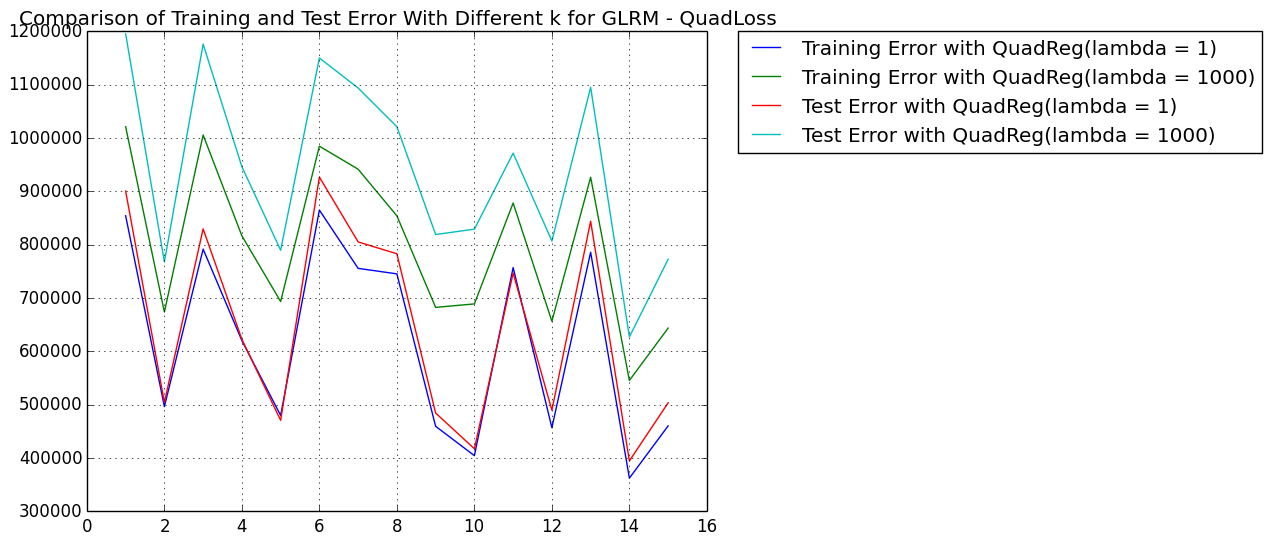

In [20]:
PyPlot.plot(1:15,errorMat[:,1],label = "Training Error with QuadReg(lambda = 1)");
PyPlot.plot(1:15,errorMat[:,2],label = "Training Error with QuadReg(lambda = 1000)");
PyPlot.plot(1:15,testsetErr[:,1],label = "Test Error with QuadReg(lambda = 1)");
PyPlot.plot(1:15,testsetErr[:,2],label = "Test Error with QuadReg(lambda = 1000)");
PyPlot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
PyPlot.grid("on")
PyPlot.title("Comparison of Training and Test Error With Different k for GLRM - QuadLoss");

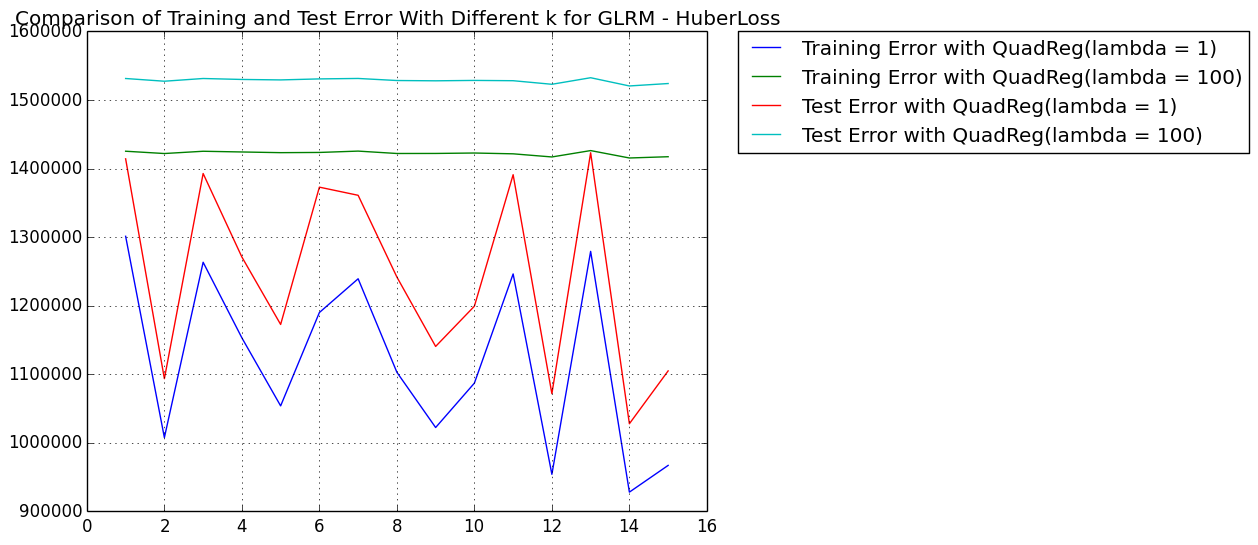

In [21]:
PyPlot.plot(1:15,errorMat[:,3],label = "Training Error with QuadReg(lambda = 1)");
PyPlot.plot(1:15,errorMat[:,4],label = "Training Error with QuadReg(lambda = 100)");
PyPlot.plot(1:15,testsetErr[:,3],label = "Test Error with QuadReg(lambda = 1)");
PyPlot.plot(1:15,testsetErr[:,4],label = "Test Error with QuadReg(lambda = 100)");
PyPlot.grid("on")
PyPlot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
PyPlot.title("Comparison of Training and Test Error With Different k for GLRM - HuberLoss");

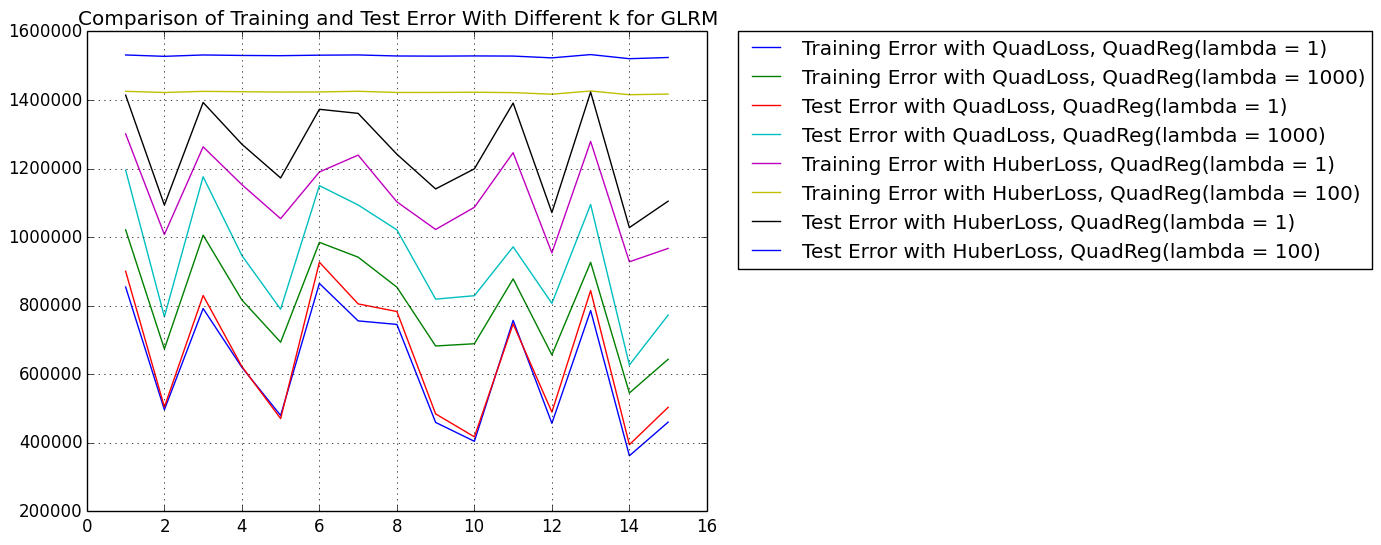

In [22]:
PyPlot.plot(1:15,errorMat[:,1],label = "Training Error with QuadLoss, QuadReg(lambda = 1)");
PyPlot.plot(1:15,errorMat[:,2],label = "Training Error with QuadLoss, QuadReg(lambda = 1000)");
PyPlot.plot(1:15,testsetErr[:,1],label = "Test Error with QuadLoss, QuadReg(lambda = 1)");
PyPlot.plot(1:15,testsetErr[:,2],label = "Test Error with QuadLoss, QuadReg(lambda = 1000)");
PyPlot.plot(1:15,errorMat[:,3],label = "Training Error with HuberLoss, QuadReg(lambda = 1)");
PyPlot.plot(1:15,errorMat[:,4],label = "Training Error with HuberLoss, QuadReg(lambda = 100)");
PyPlot.plot(1:15,testsetErr[:,3],label = "Test Error with HuberLoss, QuadReg(lambda = 1)");
PyPlot.plot(1:15,testsetErr[:,4],label = "Test Error with HuberLoss, QuadReg(lambda = 100)");
PyPlot.grid("on")
PyPlot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
PyPlot.title("Comparison of Training and Test Error With Different k for GLRM");

In [23]:
testsetErr

15×4 Array{Float64,2}:
      9.00675e5  1.19547e6  1.41422e6  1.53137e6
 504675.0        7.67887e5  1.09363e6  1.52741e6
      8.29856e5  1.17626e6  1.39283e6  1.53138e6
      6.22701e5  9.46407e5  1.27104e6  1.52998e6
      4.70885e5  7.89768e5  1.1727e6   1.52931e6
 926993.0        1.15028e6  1.37293e6  1.53079e6
      8.05336e5  1.09393e6  1.36105e6  1.53144e6
      7.83114e5  1.02135e6  1.24186e6  1.52844e6
      4.8452e5   8.19262e5  1.14064e6  1.52801e6
      4.17563e5  8.2926e5   1.19931e6  1.52858e6
      7.46959e5  9.71785e5  1.39108e6  1.52816e6
      4.89809e5  8.07061e5  1.07172e6  1.52294e6
      8.44178e5  1.09527e6  1.42308e6  1.53251e6
      3.94775e5  6.27151e5  1.02792e6  1.5205e6 
      5.03675e5  7.72779e5  1.10496e6  1.52404e6

In [25]:
errorMat

15×4 Array{Float64,2}:
      8.54524e5  1.02142e6  1.30127e6  1.42532e6
      4.9658e5   6.73953e5  1.00773e6  1.42197e6
      7.9186e5   1.00583e6  1.2634e6   1.42527e6
      6.20373e5  8.16786e5  1.15314e6  1.42423e6
 479972.0        6.93611e5  1.05395e6  1.42323e6
      8.65088e5  9.84866e5  1.19009e6  1.42354e6
      7.55759e5  9.41694e5  1.2393e6   1.4255e6 
 745460.0        8.54188e5  1.10298e6  1.42202e6
      4.59654e5  6.82626e5  1.0224e6   1.42208e6
      4.04615e5  6.89122e5  1.08712e6  1.42271e6
      7.57226e5  8.78295e5  1.24636e6  1.42153e6
      4.57026e5  6.56653e5  9.54145e5  1.41696e6
      7.86034e5  9.26643e5  1.27927e6  1.42625e6
      3.62448e5  5.45577e5  9.28168e5  1.41546e6
      4.60429e5  6.43796e5  9.67147e5  1.4173e6 

In [26]:
wMat[2,:]

33-element Array{Float64,1}:
  452.157  
 -819.76   
 -418.388  
   -2.42053
    7.84886
   -2.59092
  -19.8307 
  -33.917  
    1.25052
   18.5765 
  -15.3134 
  106.687  
 -154.801  
    ⋮      
    0.0    
    0.0    
    0.0    
    0.0    
    0.0    
    0.0    
    0.0    
    0.0    
    0.0    
    0.0    
    0.0    
    0.0    

In [ ]:
data = join(training, temperature, on = :Month, kind = :left)

In [27]:
size(dataframe)

(1440,29)

In [128]:
#w = wMat[10,1:28]
dataframe = readtable("TrainingWithk=12.csv")
XGLRM = convert(Array{Float64,2},dataframe[:,1:30])
yGLRM = dataframe[:,31].data;

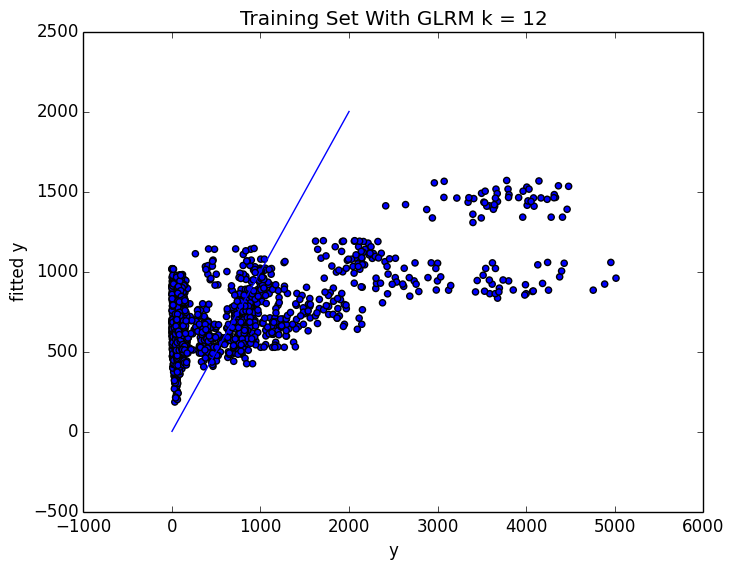

PyObject <matplotlib.text.Text object at 0x326fbbb10>

In [140]:
PyPlot.scatter(yGLRM,yfitGLRM)
PyPlot.plot(1:2000,1:2000)
PyPlot.xlabel("y")
PyPlot.ylabel("fitted y")
PyPlot.title("Training Set With GLRM k = 12")

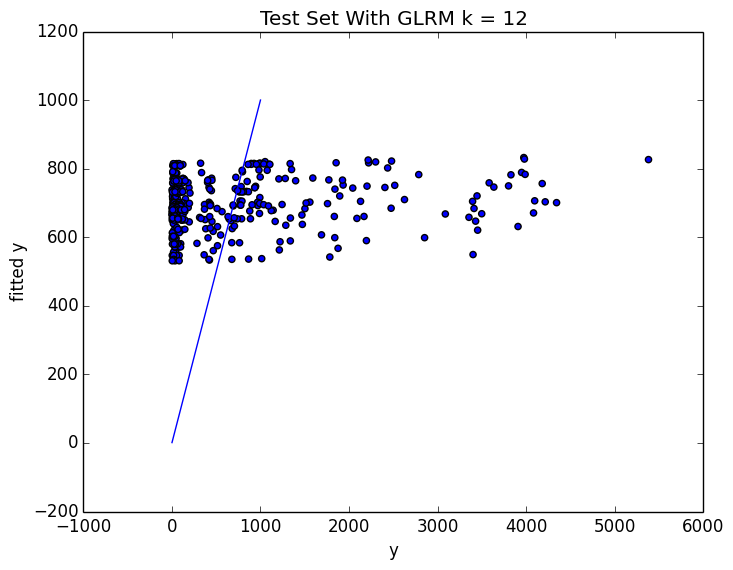

mean((yGLRM - yfitGLRM) .^ 2) = 739349.9386776851
mean((ytestGLRM - yfittestGLRM) .^ 2) = 782354.6773322193


PyObject <matplotlib.text.Text object at 0x326f0fbd0>

In [142]:
#wGLRM = proxgrad_linesearch(QuadLoss(), QuadReg(1) ,XGLRM, yGLRM; stepsize=0.1, maxiters = 500000)
#yfitGLRM = XGLRM * wGLRM
@show mean((yGLRM - yfitGLRM).^2)
#testdataframe = readtable("TestingWithk=12.csv")
#XtestGLRM = convert(Array{Float64,2},testdataframe[:,1:30])
#ytestGLRM = testdataframe[:,31].data;
yfittestGLRM = XtestGLRM*wGLRM
@show mean((ytestGLRM - yfittestGLRM).^2)
PyPlot.scatter(ytest,yfittest)
PyPlot.plot(1:1000,1:1000)
PyPlot.xlabel("y")
PyPlot.ylabel("fitted y")
PyPlot.title("Test Set With GLRM k = 12")

In [132]:
size(XtestGLRM)

(359,30)

In [136]:
ws = zeros(30,8)
objs = zeros(8)
iters = [100,500,1000,5000,10000,500000,100000,500000]
for i = 1:8
    iter = iters[i]
    w = proxgrad_linesearch(QuadLoss(), QuadReg(1) ,X, y; stepsize=0.1, maxiters = iter)
    obj = evaluate(QuadLoss(),X*w,y)+norm(w)
    ws[1:30,i] = w
    objs[i] = obj
end
semilogy(objs)

LoadError: LoadError: DimensionMismatch("tried to assign 33-element array to 30×1 destination")
while loading In[136], in expression starting on line 4

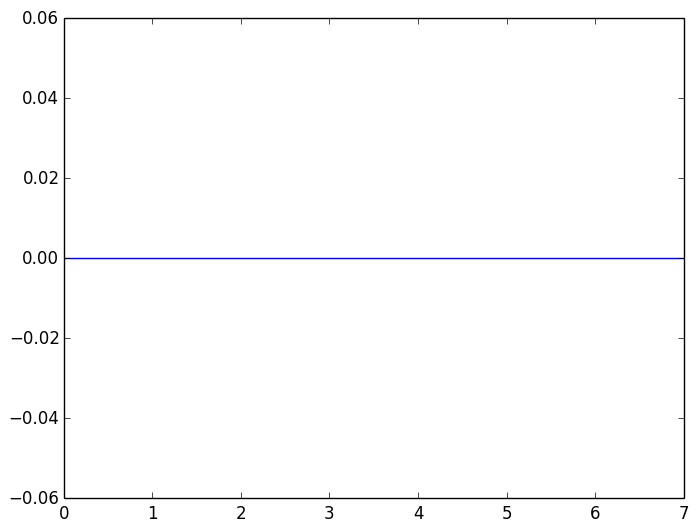

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3241e8ad0>

In [125]:
PyPlot.plot(objs)

In [126]:
yfit = X*ws[1:30,8]
@show mean((y))
PyPlot.scatter(y,yfit)
PyPlot.plot(1:2000,1:2000)

LoadError: LoadError: DimensionMismatch("second dimension of A, 33, does not match length of x, 30")
while loading In[126], in expression starting on line 1

In [144]:
onehot = readtable("train.csv")
onehot[:Month] = DateTime(onehot[:Month],"yyyy-mm-ddTHH:MM:SS");
onehot[:MonthNumber]=Dates.month(onehot[:Month]);

In [145]:
size(onehotfitdata)

(1440,59)

In [146]:
onehotfitdata

,Month,Text_General_Code,CrimeNumber,x1,Year,Unemployment,Child_mortality,hospital_ambulization_rate,Cancer_mortality,Days_good_air_quality,Homicide_mortality_rate,Suicide_mortality_rate,Theft,All_Other_Offenses,Other_Assaults,Vandalism,Narcotic,Burglary,Fraud,Retrieving,Robbery,Aggravated_Assault,Driving_Under_The_Influcence,Disorderly_Conduct,Weapon_Violations,Other_Sex_Offenses,Prostitution,Rape,Drinking_Violation,Vagrancy_Loitering,Arson,Forgery_Counterfeiting,Embezzlement,Homicide,Offenses_Against_Family_Children,Gambling_Violations,Receiving_Stolen_Property,Temperature_Max,Temperature_Min,Temperature_Avg,Temperature_Departure,HDD,CDD,Precipitation,New_Snow,Snow_Depth,MonthNumber,Jan,Feb,Mar,Apil,May,June,July,Aug,Sep,Oct,Nov,Dec
1,2010-09-01T00:00:00,Robbery,21,699,2010,0.106,78.8,1348.0,203.3,175,18.6,9.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.06666667,63.73333333,72.9,3.75,0.0,8.133333333,0.116,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2010-09-01T00:00:00,Narcotic,13,1061,2010,0.106,78.8,1348.0,203.3,175,18.6,9.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.06666667,63.73333333,72.9,3.75,0.0,8.133333333,0.116,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2008-08-01T00:00:00,Vagrancy_Loitering,23,48,2008,0.071,82.7,1541.7,211.8,128,19.8,11.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,83.64516129,65.58064516,74.61290323,-1.974193548,0.0,10.0,0.078709677,0.0,0.0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2008-06-01T00:00:00,Receiving_Stolen_Property,19,12,2008,0.071,82.7,1541.7,211.8,128,19.8,11.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,86.03333333,66.7,76.36666667,3.116666667,0.0,11.56666667,0.095666667,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2008-05-01T00:00:00,Forgery_Counterfeiting,9,59,2008,0.071,82.7,1541.7,211.8,128,19.8,11.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,70.93548387,51.41935484,61.17741935,-2.722580645,4.806451613,1.193548387,0.146774194,0.0,0.0,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2009-03-01T00:00:00,Vagrancy_Loitering,23,92,2009,0.097,77.2,1476.9,219.1,185,18.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,52.25806452,35.03225806,43.64516129,0.090322581,21.06451613,0.0,0.052258065,0.290322581,0.483870968,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2009-05-01T00:00:00,Vandalism,24,1644,2009,0.097,77.2,1476.9,219.1,185,18.0,10.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74.09677419,55.93548387,65.01612903,1.116129032,2.548387097,2.774193548,0.156129032,0.0,0.0,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2010-10-01T00:00:00,Receiving_Stolen_Property,19,4,2010,0.106,78.8,1348.0,203.3,175,18.6,9.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,67.70967742,50.32258065,59.01612903,1.519354839,6.419354839,0.612903226,0.161612903,0.0,0.0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,2009-02-01T00:00:00,Drinking_Violation,7,495,2009,0.097,77.2,1476.9,219.1,185,18.0,10.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46.0,28.10714286,37.05357143,1.296428571,27.64285714,0.0,0.03,0.3,0.821428571,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2006-09-01T00:00:00,Theft,22,4364,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74.96666667,59.26666667,67.11666667,-2.033333333,1.133333333,3.4,0.199,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [147]:
onehot[:Jan] = onehot[:MonthNumber] .== 1
onehot[:Jan] = 1.0 * onehot[:Jan]
onehot[:Feb] = onehot[:MonthNumber] .== 2
onehot[:Feb] = 1.0 * onehot[:Feb]
onehot[:Mar] = onehot[:MonthNumber] .== 3
onehot[:Mar] = 1.0 * onehot[:Mar]
onehot[:Apil] = onehot[:MonthNumber] .== 4
onehot[:Apil] = 1.0 * onehot[:Apil]
onehot[:May] = onehot[:MonthNumber] .== 5
onehot[:May] = 1.0 * onehot[:May]
onehot[:June] = onehot[:MonthNumber] .== 6
onehot[:June] = 1.0 * onehot[:June]
onehot[:July] = onehot[:MonthNumber] .== 7
onehot[:July] = 1.0 * onehot[:July]
onehot[:Aug] = onehot[:MonthNumber] .== 8
onehot[:Aug] = 1.0 * onehot[:Aug]
onehot[:Sep] = onehot[:MonthNumber] .== 9
onehot[:Sep] = 1.0* onehot[:Sep]
onehot[:Oct] = onehot[:MonthNumber] .== 10
onehot[:Oct] = 1.0 * onehot[:Oct]
onehot[:Nov] = onehot[:MonthNumber] .== 11
onehot[:Nov] = 1.0 * onehot[:Nov]
onehot[:Dec] = onehot[:MonthNumber] .== 12;
onehot[:Dec] = 1.0 * onehot[:Dec];

In [148]:
onehotfitdata = onehot[sample,:]
onehottestdata = onehot[setdiff(1:n,sample),:];

In [149]:
onehotfitdata

,Month,Text_General_Code,CrimeNumber,x1,Year,Unemployment,Child_mortality,hospital_ambulization_rate,Cancer_mortality,Days_good_air_quality,Homicide_mortality_rate,Suicide_mortality_rate,Theft,All_Other_Offenses,Other_Assaults,Vandalism,Narcotic,Burglary,Fraud,Retrieving,Robbery,Aggravated_Assault,Driving_Under_The_Influcence,Disorderly_Conduct,Weapon_Violations,Other_Sex_Offenses,Prostitution,Rape,Drinking_Violation,Vagrancy_Loitering,Arson,Forgery_Counterfeiting,Embezzlement,Homicide,Offenses_Against_Family_Children,Gambling_Violations,Receiving_Stolen_Property,Temperature_Max,Temperature_Min,Temperature_Avg,Temperature_Departure,HDD,CDD,Precipitation,New_Snow,Snow_Depth,MonthNumber,Jan,Feb,Mar,Apil,May,June,July,Aug,Sep,Oct,Nov,Dec
1,2010-09-01T00:00:00,Robbery,21,699,2010,0.106,78.8,1348.0,203.3,175,18.6,9.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.06666667,63.73333333,72.9,3.75,0.0,8.133333333,0.116,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2010-09-01T00:00:00,Narcotic,13,1061,2010,0.106,78.8,1348.0,203.3,175,18.6,9.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.06666667,63.73333333,72.9,3.75,0.0,8.133333333,0.116,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2008-08-01T00:00:00,Vagrancy_Loitering,23,48,2008,0.071,82.7,1541.7,211.8,128,19.8,11.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,83.64516129,65.58064516,74.61290323,-1.974193548,0.0,10.0,0.078709677,0.0,0.0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2008-06-01T00:00:00,Receiving_Stolen_Property,19,12,2008,0.071,82.7,1541.7,211.8,128,19.8,11.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,86.03333333,66.7,76.36666667,3.116666667,0.0,11.56666667,0.095666667,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2008-05-01T00:00:00,Forgery_Counterfeiting,9,59,2008,0.071,82.7,1541.7,211.8,128,19.8,11.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,70.93548387,51.41935484,61.17741935,-2.722580645,4.806451613,1.193548387,0.146774194,0.0,0.0,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2009-03-01T00:00:00,Vagrancy_Loitering,23,92,2009,0.097,77.2,1476.9,219.1,185,18.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,52.25806452,35.03225806,43.64516129,0.090322581,21.06451613,0.0,0.052258065,0.290322581,0.483870968,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2009-05-01T00:00:00,Vandalism,24,1644,2009,0.097,77.2,1476.9,219.1,185,18.0,10.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74.09677419,55.93548387,65.01612903,1.116129032,2.548387097,2.774193548,0.156129032,0.0,0.0,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2010-10-01T00:00:00,Receiving_Stolen_Property,19,4,2010,0.106,78.8,1348.0,203.3,175,18.6,9.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,67.70967742,50.32258065,59.01612903,1.519354839,6.419354839,0.612903226,0.161612903,0.0,0.0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,2009-02-01T00:00:00,Drinking_Violation,7,495,2009,0.097,77.2,1476.9,219.1,185,18.0,10.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46.0,28.10714286,37.05357143,1.296428571,27.64285714,0.0,0.03,0.3,0.821428571,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2006-09-01T00:00:00,Theft,22,4364,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74.96666667,59.26666667,67.11666667,-2.033333333,1.133333333,3.4,0.199,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [158]:
writetable("One-HotTraining.csv",onehotfitdata)
writetable("One-HotTesting.csv",onehottestdata)

In [151]:
X = hcat(convert(Array{Float64,2},onehotfitdata[:,5:45]),convert(Array{Float64,2},onehotfitdata[:,47:59]))
y = onehotfitdata[:x1].data;

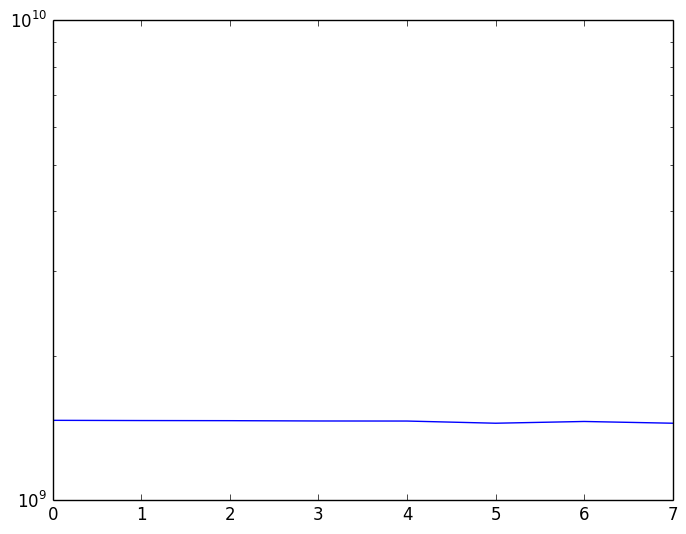

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x325b7d450>

In [152]:
ws = zeros(54,8)
objs = zeros(8)
iters = [100,500,1000,5000,10000,500000,100000,500000]
for i = 1:8
    iter = iters[i]
    w = proxgrad_linesearch(QuadLoss(), QuadReg(1) ,X, y; stepsize=0.1, maxiters = iter)
    obj = evaluate(QuadLoss(),X*w,y)+norm(w)
    ws[1:54,i] = w
    objs[i] = obj
end
semilogy(objs)

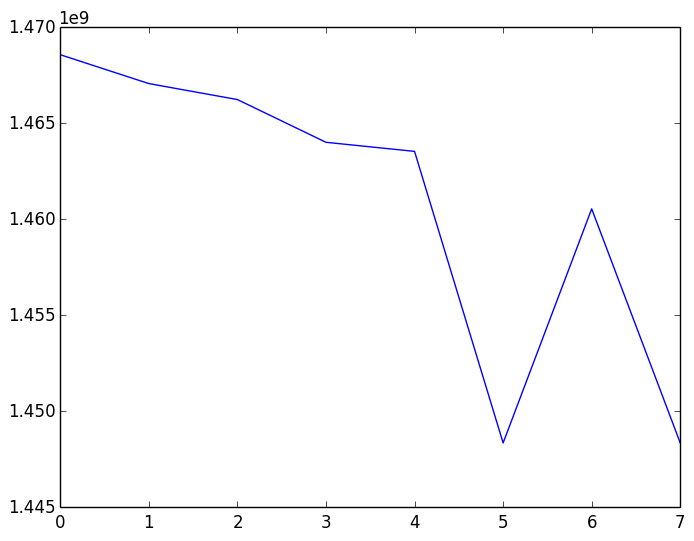

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x325bc6a90>

In [153]:
PyPlot.plot(objs)

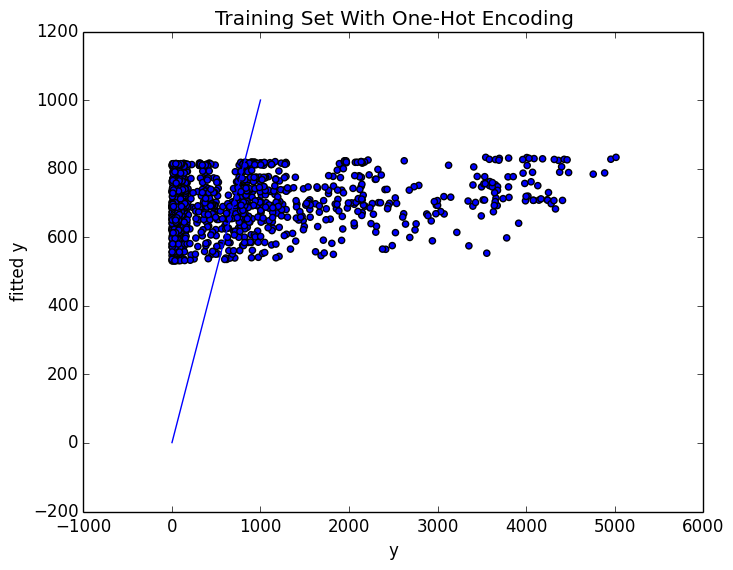

mean((y - yfit) .^ 2) = 1.0058048562751734e6


PyObject <matplotlib.text.Text object at 0x329eef250>

In [154]:
yfit = X*ws[1:54,6]
@show mean((y-yfit).^2)
PyPlot.scatter(y,yfit)
PyPlot.plot(1:1000,1:1000)
PyPlot.xlabel("y")
PyPlot.ylabel("fitted y")
PyPlot.title("Training Set With One-Hot Encoding")

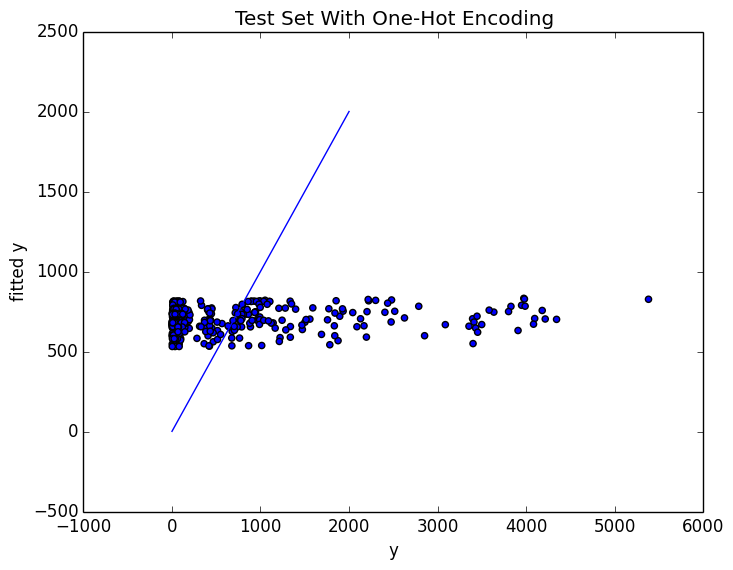

mean((ytest - yfittest) .^ 2) = 1.0812138345962258e6


PyObject <matplotlib.text.Text object at 0x325276f50>

In [156]:
onehottestdata
Xtest = hcat(convert(Array{Float64,2},onehottestdata[:,5:45]),convert(Array{Float64,2},onehottestdata[:,47:59]))
ytest = onehottestdata[:x1].data;
yfittest = Xtest*ws[1:54,6]
@show mean((ytest - yfittest).^2)
PyPlot.scatter(ytest,yfittest)
PyPlot.plot(1:2000,1:2000)
PyPlot.xlabel("y")
PyPlot.ylabel("fitted y")
PyPlot.title("Test Set With One-Hot Encoding")